# **Artificial Neural Networks: Street View Housing Number Digit Recognition**
This project aimes on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.
--------------
### **Context:** 
--------------
One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a feed forward neural network model that can identify the digits in the images. 

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Start by mounting the drive and importing the necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

Check for the version of TensorFlow.

In [ ]:
print(tf.__version__)

2.8.0


## **Load the dataset**
- Load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Check the number of images in the training and testing data.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualize images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

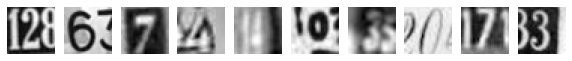

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualize the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to flatten them. Figure out the required shape
- Normalise the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshape the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

#### **Normalize the train and test data**

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observations**
- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Build an ANN model.

In [ ]:
# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **64 nodes and relu activation** and the input shape which is used above
 - Second hidden layer with **32 nodes and relu activation**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Build and train a ANN model as per the above mentioned architecture**

In [ ]:
# Import losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Define the function
def nn_model_1():
    model = Sequential([
      tf.keras.layers.Flatten(input_shape = (1024, )),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(32, activation = 'relu'),
      tf.keras.layers.Dense(10, activation = 'softmax')
    ]) 
    # Add layers as per the architecture mentioned above in the same sequence
    
    # declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 1e-3)
    
    # compile the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
# Build the model
model_1 = nn_model_1()

In [ ]:
# Print the summary
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_49 (Dense)            (None, 64)                65600     
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dense_51 (Dense)            (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 128)

Epoch 1/20
263/263 [==============================] - 2s 7ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.7953 - accuracy: 0.3824 - val_loss: 1.6499 - val_accuracy: 0.4551
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.5726 - accuracy: 0.4828 - val_loss: 1.4957 - val_accuracy: 0.5094
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4604 - accuracy: 0.5268 - val_loss: 1.4267 - val_accuracy: 0.5357
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.4008 - accuracy: 0.5503 - val_loss: 1.3652 - val_accuracy: 0.5613
Epoch 7/20
263/263 [==============================] - 1s 6ms/step - loss: 1.3588 - accuracy: 0.5682 - val_loss: 1.3282 - val_accuracy: 0.5799
Epoch 

### **Plot the validation and training accuracies**

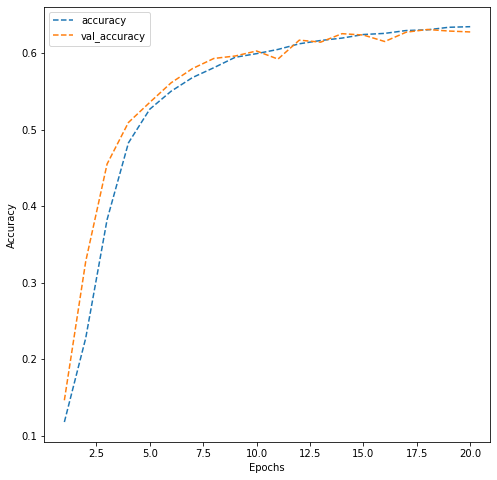

In [ ]:
# plot the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
* **1. The first ANN model with 2 layers** - We reshape the 2D image Data to 1D array and utilize tensorflow to build a brand new ANN model with 2 layers only to start, leaving some room to add more layers in the next model if needed. 
* **2. Accuracy reaches .68** - The accuracy of this very first ANN model has a very tough start with accuracy only around 0.1~0.2. However, the model learns very quickly and eventually reaches .68 after 30 epochs which is not too good but at least better than flipping the coin with 50% chance. It looks like the model does not reach the limitation yet since the accuracy keeps increasing while the 20 epochs around 0.68. We may give it a try in the newer model to increase the epochs.
* **3. Validation accuracy goes with accuracy ver well** - no overfitting risk - We could easily see the validaction accuracy is always very close to the accuracy all the way. We could say the model can replicate the performance on the validation data which indicates no overfitting risk.



Build one more model with higher complexity and see if we can improve the performance of the model. 

Clear the previous model's history from the keras backend. Fix the seed again after clearing the backend.

In [ ]:
# Clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **256 nodes and relu activation**
 - Second hidden layer with **128 nodes and relu activation**
 - Add the **Dropout layer with rate equal to 0.2**
 - Third hidden layer with **64 nodes and relu activation**
 - Fourth hidden layer with **64 nodes and relu activation**
 - Fifth hidden layer with **32 nodes and relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Import losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Define the function
def nn_model_2():
    model = Sequential([
      tf.keras.layers.Flatten(input_shape = (1024, )),
      tf.keras.layers.Dense(256, activation = 'relu'),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dropout(0.2, input_shape = (1024,)),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(32, activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = 'softmax')
    ]) 
    # Add layers as per the architecture mentioned above in the same sequence
    
    # declare adam optimizer with learning rate of 0.0005 
    adam = optimizers.Adam(learning_rate = 5e-4)
    
    # compile the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
# Build the model
model_2 = nn_model_2()

In [ ]:
# Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [ ]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, epochs = 30, validation_split = .2, batch_size = 128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 4s 12ms/step - loss: 2.3346 - accuracy: 0.1002 - val_loss: 2.3139 - val_accuracy: 0.0985
Epoch 2/30
263/263 [==============================] - 3s 12ms/step - loss: 2.3023 - accuracy: 0.1072 - val_loss: 2.2944 - val_accuracy: 0.1225
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 2.0815 - accuracy: 0.1963 - val_loss: 2.0802 - val_accuracy: 0.2286
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.6827 - accuracy: 0.4115 - val_loss: 1.5690 - val_accuracy: 0.4737
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 1.4126 - accuracy: 0.5264 - val_loss: 1.3555 - val_accuracy: 0.5450
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 1.2738 - accuracy: 0.5780 - val_loss: 1.1789 - val_accuracy: 0.6145
Epoch 7/30
263/263 [==============================] - 3s 13ms/step - loss: 1.1798 - accuracy: 0.6143 - val_loss: 1.1785 - val_accuracy: 0.6108

### **Plot the validation and training accuracies**

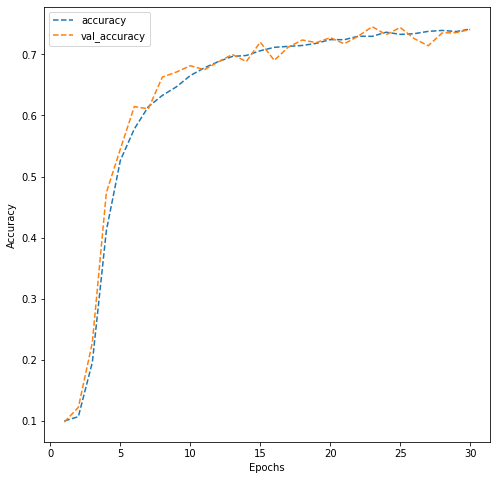

In [ ]:
# plot the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
* **1. The newer ANN model with the addition of 3 more layers, and also a droptout layer, a batchnormlization layer, and 10 more epochs** - 
  * **1) 3 more layers** - We build the newer ANN model from 2 to 5 layers.
  * **2) 1 more dropout layer** - The dropout layer works as the regulization to prevent over-fitting while more layers are added. This layer could randomly set up the neuron with the chance to be dropped out.  
  * **3) 1 more batchnormolization layer** -  We added this layer to train very deep neural network (like we have 5 layers now) that standardizes the inputs to a layer for each mini-batch. We expect to stabilize the learning process and reduce the number of training epochs required.  
  * **4) 10 more epochs** - We added 10 more epoches on top of the original 20 epochs.
* **2. Accuracy reaches .74. Betterh than the 1st model** - The accuracy of our newer model also has a very tough start with the accuracy only around 0.1. However, the model learns very quickly and eventually reaches .74 after 30 epochs which is even better (the previous one is around 0.68). It looks like reaching the limitation and becomes constnat since the accuracy touches around 0.75 after the 23 epoch then maintains 073~0.75 all the way to the 30th epoch. We welcome the accuracy improvement from the 1st model with the new setup.
* **3. Validation accuracy goes with accuracy ver well - no overfitting risk** - We could easily see the validaction accuracy is always very close to the accuracy all the way. We could say the model can replicate the performance on the validation data which indicates no overfitting risk.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Print the classification report and the confusion matrix for the test predictions**

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1814
           1       0.71      0.81      0.76      1828
           2       0.76      0.77      0.76      1803
           3       0.73      0.69      0.71      1719
           4       0.74      0.83      0.78      1812
           5       0.73      0.67      0.70      1768
           6       0.79      0.68      0.73      1832
           7       0.77      0.80      0.78      1808
           8       0.66      0.72      0.69      1812
           9       0.75      0.70      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.74      0.74      0.74     18000
weighted avg       0.74      0.74      0.74     18000



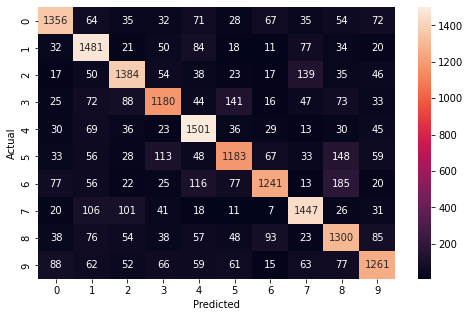

In [ ]:
# import required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print the classification report
print(classification_report(y_test, test_pred))

# Plot the heatmap using confusion matrix
# create confusion matrix using actual labels and predicted labels
cm = confusion_matrix(y_test, test_pred) 

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations**

* **1. Overall the accuracy is 0.74** - The confusion matrix on the test data shows that no matter from macro or weighted average to see the overall accuracy is 0.74. The f1 score ranges from 0.69 to 0.78. We're good at this model performance.
* **2. Recall ranges from 0.67 to 0.83**-  Among all the 10 classes, recall ranges from 0.67 to 0.83. The class 5 works the best 0.83 and the class 4 works the worst with 0.67.
* **3. The best class 4 with the highest performance is label "4"** - The class 4 is a number "4" for model to learn. The model works the best with recall 0.83. (the f1 score 0.78 - still pretty high and the highest among 10 classes).
* **4. The worse class 5 with the lowest performance is label "0"** - The class 5 is a very ambigious "0" for model to learn. The model perform lower with the recall 0.67. (the f1 score 0.70, the lowest among the 10 classes). Very likely the model has a lower capability to learns the "0" with a non-standard shape. However, the recall of 0.67 is good. 
* **5. Dropout layer effect** - We believe the dropout layer performs to lower the overfitting.
* **6. Conclusion of this ANN model, TensorFlow, Keras and Google Colab experiences** - 
 * **1) Artificial neural network model** - We learn the new technique to utilize the ANN model with more finetune of the setup like more layers with regulization and more epochs to make the model perform better. ANN model is a good machine learning approach.
 * **2) TensorFlow** -  We also learn the new library TensorFlow - which is a powerful deep learning tool to deal with voice, sound, video, text-based related scenarios.
 * **3) Keras** - We also learn the great API Keras for TensorFlow usage. Keras is a wonderful interface for training deep learning models. It's a popular tool also used by Netflix, Yelp and Uber. Happy to learn this tool!
 * **4) Google Colab** - Google offeres this great tool which is similar with Jupyter but more sharable and integrated with google offering. Pretty good at markdown pre-view model.